In [1]:
# import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.

In [2]:
# read the dataset and extract the features and target separately
train = pd.read_csv('/home/praveen/projects/fifa/train.csv')
test = pd.read_csv('/home/praveen/projects/fifa/test.csv')
sample = pd.read_csv('/home/praveen/projects/fifa/sample_submission.csv')

In [3]:
train.head()

,Id,Name,Age,Nationality,Overall,Potential,Club,Value (M),Wage (M),Position
0,17221,F. Burdenski,25,Germany,54,58,Korona Kielce,0.07,0.001,CDM
1,11353,A. Deiola,21,Italy,64,73,Cagliari,0.70,0.010,CM
2,3402,T. Castagne,21,Belgium,72,79,Atalanta,3.70,0.013,RB
3,16071,D. Gorman,21,Northern Ireland,57,66,Stevenage,0.16,0.002,CM
4,12380,N. Molina Lucero,19,Argentina,63,75,Boca Juniors,0.55,0.002,LB


In [4]:
test.head()

,Id,Name,Age,Nationality,Overall,Potential,Club,Wage (M),Position
0,280,C. Vela,28,Mexico,82,82,Real Sociedad,0.046,ST
1,569,J. Stones,23,England,79,85,Manchester City,0.105,CB
2,8731,V. Vermeij,22,Netherlands,67,74,Heracles Almelo,0.007,ST
3,10085,G. Omae,27,Japan,65,65,Omiya Ardija,0.002,CAM
4,9831,N. Miatke,27,Germany,66,67,FSV Zwickau,0.001,LM


In [5]:
train.shape  ,  test.shape

((14384, 10), (3597, 9))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14384 entries, 0 to 14383
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           14384 non-null  int64  
 1   Name         14384 non-null  object 
 2   Age          14384 non-null  int64  
 3   Nationality  14384 non-null  object 
 4   Overall      14384 non-null  int64  
 5   Potential    14384 non-null  int64  
 6   Club         14173 non-null  object 
 7   Value (M)    14384 non-null  float64
 8   Wage (M)     14384 non-null  float64
 9   Position     14384 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 1.1+ MB


In [7]:
train.describe()

,Id,Age,Overall,Potential,Value (M),Wage (M)
count,14384.000000,14384.000000,14384.000000,14384.000000,14384.000000,14384.000000
mean,8992.892728,25.148776,66.237695,71.181869,2.344967,0.011435
std,5183.996368,4.620911,6.954458,6.074111,5.105376,0.022614
min,0.000000,16.000000,46.000000,46.000000,0.000000,0.000000
25%,4480.750000,21.000000,62.000000,67.000000,0.300000,0.002000
50%,9001.500000,25.000000,66.000000,71.000000,0.675000,0.004000
75%,13470.250000,28.000000,71.000000,75.000000,2.100000,0.012000
max,17980.000000,47.000000,94.000000,94.000000,105.000000,0.565000


In [8]:
train.isnull().sum()

Id               0
Name             0
Age              0
Nationality      0
Overall          0
Potential        0
Club           211
Value (M)        0
Wage (M)         0
Position         0
dtype: int64

### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Check for the correlation between the features

In [9]:
train.dtypes

Id               int64
Name            object
Age              int64
Nationality     object
Overall          int64
Potential        int64
Club            object
Value (M)      float64
Wage (M)       float64
Position        object
dtype: object

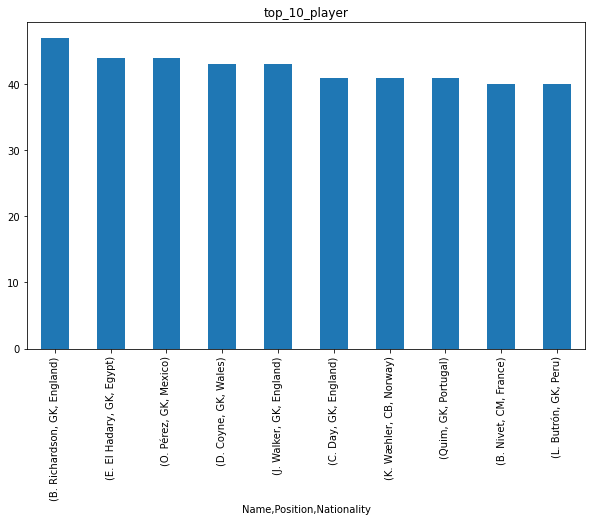

In [36]:
top_10_player = train.groupby(['Name', 'Position','Nationality'])['Age'].median().nlargest(10)

top_10_player.plot(kind = 'bar',title= 'top_10_player',figsize = (10,6))

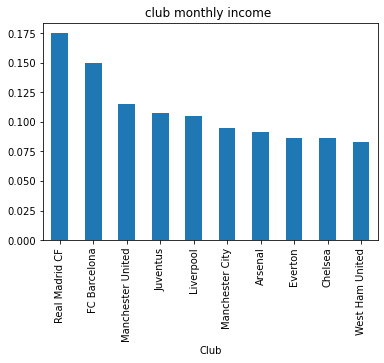

In [12]:
monthly_income = train.groupby('Club')['Wage (M)'].median().nlargest(10)

monthly_income.plot(kind = 'bar',title = 'club monthly income ')

Age          25.148776
Overall      66.237695
Potential    71.181869
dtype: float64


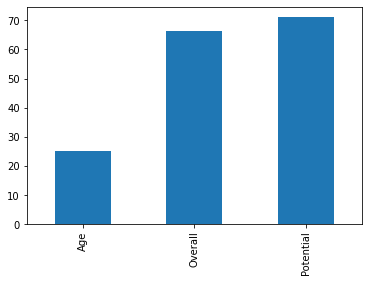

In [46]:
player = pd.DataFrame(train,columns=['Age','Overall','Potential']).mean()
print(player)
player.head(10).plot(kind='bar')

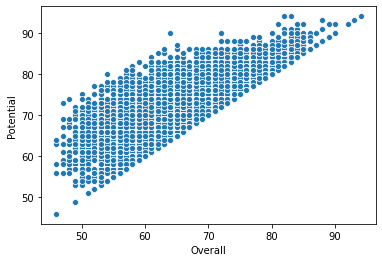

In [37]:
sns.scatterplot(x = 'Overall',y='Potential',data=train)

,Id,Name,Age,Nationality,Overall,Potential,Club,Value (M),Wage (M),Position
0,17221,F. Burdenski,25,Germany,54,58,Korona Kielce,0.07,0.001,CDM
1,11353,A. Deiola,21,Italy,64,73,Cagliari,0.70,0.010,CM
2,3402,T. Castagne,21,Belgium,72,79,Atalanta,3.70,0.013,RB
3,16071,D. Gorman,21,Northern Ireland,57,66,Stevenage,0.16,0.002,CM
4,12380,N. Molina Lucero,19,Argentina,63,75,Boca Juniors,0.55,0.002,LB


Nationality  Club             
Uruguay      FC Barcelona         97.00
Portugal     Real Madrid CF       95.50
Germany      Real Madrid CF       79.00
Argentina    Juventus             78.00
Wales        Real Madrid CF       69.50
Chile        Arsenal              67.50
Argentina    Manchester City      66.50
Gabon        Borussia Dortmund    61.00
Argentina    FC Barcelona         57.75
Slovenia     Atlético Madrid      57.00
Name: Value (M), dtype: float64


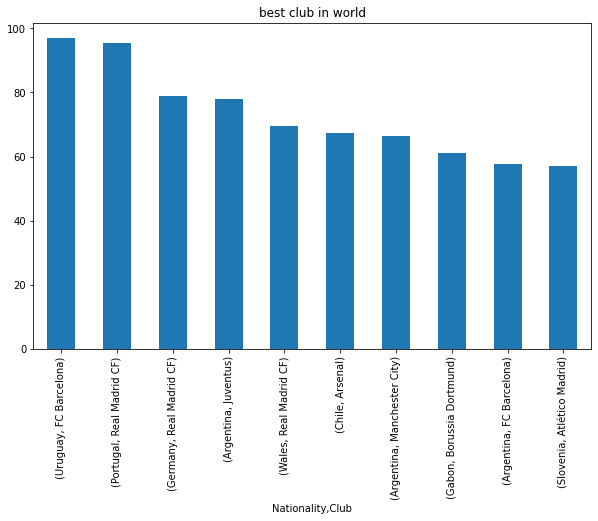

In [55]:
best_club = train.groupby(['Nationality','Club'])['Value (M)'].median().nlargest(10)
print(best_club)
best_club.plot(kind='bar',title='best club in world',figsize = (10,6))

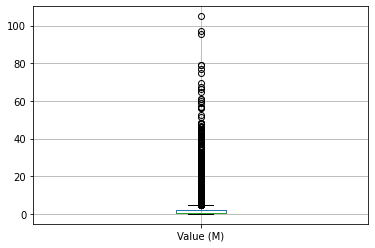

In [56]:
train.boxplot(column = 'Value (M)')

In [57]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Id           8989.50
Age             7.00
Overall         9.00
Potential       8.00
Value (M)       1.80
Wage (M)        0.01
dtype: float64


In [58]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range,upper_range

In [59]:
lowprice,uppprice = remove_outlier(train['Value (M)'])
train['Value (M)']=np.where(train['Value (M)']>uppprice,uppprice,train['Value (M)'])
train['Value (M)']=np.where(train['Value (M)']<lowprice,lowprice,train['Value (M)'])

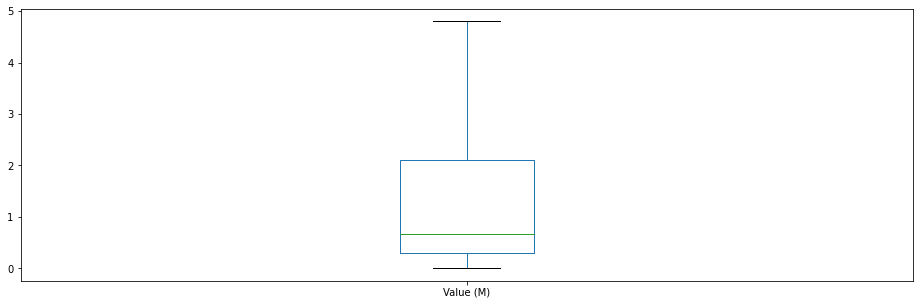

In [60]:
train['Value (M)'].plot.box(figsize=(16,5))
plt.show()

In [61]:
train['Value (M)'].skew()

1.2110520267296652

### Model building

- Separate the features and target and then split the train data into train and validation set.
- Now let's come to the actual task, using linear regression, predict the `Value (M)`. 
- Try improving upon the `r2_score` (R-Square) using different parameters that give the best score. You can use higher degree [Polynomial Features of sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) to improve the model prediction. 



In [64]:
test.head()

,Id,Name,Age,Nationality,Overall,Potential,Club,Wage (M),Position
0,280,C. Vela,28,Mexico,82,82,Real Sociedad,0.046,ST
1,569,J. Stones,23,England,79,85,Manchester City,0.105,CB
2,8731,V. Vermeij,22,Netherlands,67,74,Heracles Almelo,0.007,ST
3,10085,G. Omae,27,Japan,65,65,Omiya Ardija,0.002,CAM
4,9831,N. Miatke,27,Germany,66,67,FSV Zwickau,0.001,LM


In [63]:
train.drop(['Id','Name','Nationality','Club','Position'],axis=1,inplace=True)

In [65]:
test.drop(['Id','Name','Nationality','Club','Position'],axis=1,inplace=True)

In [66]:
train.head()

,Age,Overall,Potential,Value (M),Wage (M)
0,25,54,58,0.07,0.001
1,21,64,73,0.70,0.010
2,21,72,79,3.70,0.013
3,21,57,66,0.16,0.002
4,19,63,75,0.55,0.002


In [70]:
data = pd.get_dummies(train)
data.head()

,Age,Overall,Potential,Value (M),Wage (M)
0,25,54,58,0.07,0.001
1,21,64,73,0.70,0.010
2,21,72,79,3.70,0.013
3,21,57,66,0.16,0.002
4,19,63,75,0.55,0.002


In [71]:
data_test= pd.get_dummies(test)
data_test.head()

,Age,Overall,Potential,Wage (M)
0,28,82,82,0.046
1,23,79,85,0.105
2,22,67,74,0.007
3,27,65,65,0.002
4,27,66,67,0.001


In [72]:
data['Wage (M)'].corr(data['Value (M)'])

0.5980522063981402

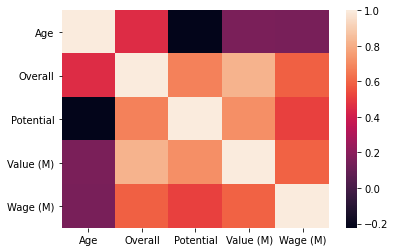

In [87]:
sns.heatmap(train.corr())

In [73]:
X = data.copy()
y = data['Value (M)']

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y,train_size =0.75, random_state=0)


In [75]:
X_train.shape , X_val.shape ,y_train.shape , y_val.shape

((10788, 5), (3596, 5), (10788,), (3596,))

In [81]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,accuracy_score

In [82]:
# Initializing the Linear regression model
lr = LinearRegression()
# Fitting the data
lr.fit(X,y)
# Getting the predictions on the test data
y_pred = lr.predict(X)
# Finding the RMSE
rmse_lr = mean_squared_error(y,y_pred) ** 0.5

print(rmse_lr)

1.8408068985276193e-15


Text(0, 0.5, 'y_pred')

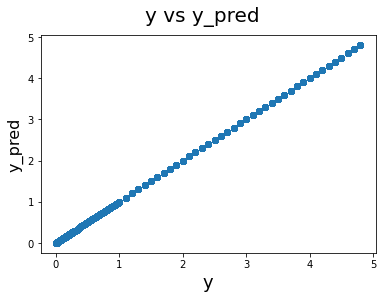

In [83]:
fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [84]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)

gbr.fit(X,y)

y_pred_gbr = gbr.predict(X)

rmse_gbr = mean_squared_error(y,y_pred_gbr) ** 0.5

print(rmse_gbr)

0.0026984271828447513


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

(3597, 2)